Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Dataset Description:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320

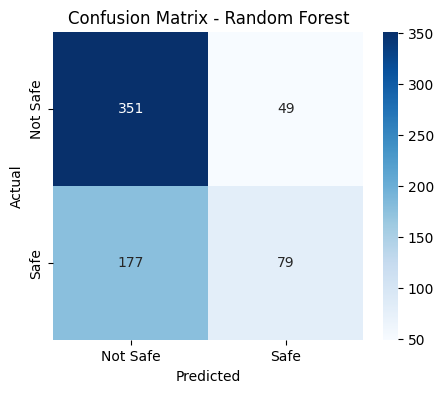

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("water_potability.csv")

# ---- Dataset Exploration ----
print("Basic Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# ---- Handling Missing Values ----
df = df.fillna(df.mean())   # replace missing values with column means

# ---- Features (X) and Target (y) ----
X = df.drop("Potability", axis=1)
y = df["Potability"]

# ---- Convert to Machine Readable (Scaling) ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Splitting the Data ----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nShapes after split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# ---- Model Training (Random Forest) ----
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ---- Predictions ----
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# ---- Evaluation ----
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("\nRandom Forest Evaluation:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Safe", "Safe"], yticklabels=["Not Safe", "Safe"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

